## Linear Classification ANN
#### Developed a model to classify whether a tumor is malignant or benign based on various attributes

In [ ]:
import tensorflow as tf

In [ ]:
from  sklearn.datasets import load_breast_cancer

#### Loading and understanding the data

In [ ]:
data = load_breast_cancer()

In [6]:
type(data)

sklearn.utils.Bunch

In [7]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data.data)

In [ ]:
df['target'] = data.target

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("target", axis = 1), df["target"], test_size =0.33)

In [16]:
x_train.shape

(381, 30)

#### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Building and training the model

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(30,)),
                                    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [ ]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [23]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 16ms/step - loss: 0.5450 - accuracy: 0.7034 - val_loss: 0.6003 - val_accuracy: 0.6968
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.7480 - val_loss: 0.5430 - val_accuracy: 0.7553
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4458 - accuracy: 0.8005 - val_loss: 0.4952 - val_accuracy: 0.7926
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8268 - val_loss: 0.4545 - val_accuracy: 0.8245
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3756 - accuracy: 0.8635 - val_loss: 0.4202 - val_accuracy: 0.8511
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3492 - accuracy: 0.8871 - val_loss: 0.3901 - val_accuracy: 0.8617
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3258 - accuracy: 0.9055 - val_loss: 0.3652 - val_accuracy: 0.8617
Epoch 8/100


#### Evaluating the model

In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


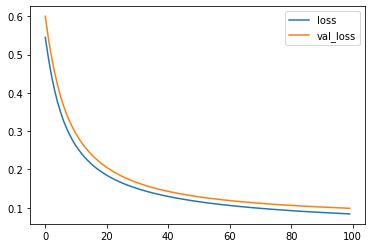

In [25]:
plt.plot(r.history['loss'],label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
print(r.history.keys())
plt.legend()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_test, model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        69
           1       0.96      1.00      0.98       119

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



In [30]:
print(confusion_matrix(y_test, model.predict_classes(x_test)))

[[ 64   5]
 [  0 119]]
